In [61]:
import json
import matplotlib.pyplot as plt
import numpy as new_path
import pandas as pd
import seaborn as sns
import os

In [62]:
data_path = "logs/2023-11-08T15-08-00_custom_vqgan/testtube/version_0/metrics.csv"

In [63]:
df = pd.read_csv(data_path)

In [64]:
print(df.columns.to_list())

['val/rec_loss_step/epoch_0', 'val/aeloss_step/epoch_0', 'created_at', 'train/aeloss_step', 'train/total_loss_step', 'train/quant_loss_step', 'train/nll_loss_step', 'train/rec_loss_step', 'train/p_loss_step', 'train/d_weight_step', 'train/disc_factor_step', 'train/g_loss_step', 'train/discloss_step', 'train/disc_loss_step', 'train/logits_real_step', 'train/logits_fake_step', 'epoch', 'val/rec_loss_epoch', 'val/rec_loss', 'val/aeloss_epoch', 'val/total_loss', 'val/quant_loss', 'val/nll_loss', 'val/p_loss', 'val/d_weight', 'val/disc_factor', 'val/g_loss', 'val/disc_loss', 'val/logits_real', 'val/logits_fake', 'train/aeloss_epoch', 'train/total_loss_epoch', 'train/quant_loss_epoch', 'train/nll_loss_epoch', 'train/rec_loss_epoch', 'train/p_loss_epoch', 'train/d_weight_epoch', 'train/disc_factor_epoch', 'train/g_loss_epoch', 'train/discloss_epoch', 'train/disc_loss_epoch', 'train/logits_real_epoch', 'train/logits_fake_epoch', 'val/rec_loss_step/epoch_1', 'val/aeloss_step/epoch_1', 'val/rec_

In [65]:
train_list = []

for temp in df.columns.to_list():
    if "train" in temp and "epoch" in temp:
        train_list.append(temp)

print(len(train_list))
train_list

13


['train/aeloss_epoch',
 'train/total_loss_epoch',
 'train/quant_loss_epoch',
 'train/nll_loss_epoch',
 'train/rec_loss_epoch',
 'train/p_loss_epoch',
 'train/d_weight_epoch',
 'train/disc_factor_epoch',
 'train/g_loss_epoch',
 'train/discloss_epoch',
 'train/disc_loss_epoch',
 'train/logits_real_epoch',
 'train/logits_fake_epoch']

In [66]:
train_df = df[train_list]
train_df = train_df.dropna()
print(len(train_df))

epoches = [int(i) for i in range(0, len(train_df))]
train_df["epoch"] = epoches
train_df.head(5)

40


,train/aeloss_epoch,train/total_loss_epoch,train/quant_loss_epoch,train/nll_loss_epoch,train/rec_loss_epoch,train/p_loss_epoch,train/d_weight_epoch,train/disc_factor_epoch,train/g_loss_epoch,train/discloss_epoch,train/disc_loss_epoch,train/logits_real_epoch,train/logits_fake_epoch,epoch
1278,0.584791,0.584791,0.152602,0.432189,0.432189,0.315457,1.439277,0.000000,-0.013269,0.000000,0.000000,0.006491,0.013269,0
2556,0.615414,0.615414,0.023872,0.354010,0.354010,0.246999,42.683941,0.862861,0.005385,0.864129,0.864129,-0.006089,-0.003708,1
3834,1.192637,1.192637,0.020622,0.324252,0.324252,0.225530,80.521866,1.000000,0.010725,1.000403,1.000403,-0.010590,-0.009973,2
5112,0.358578,0.358578,0.018618,0.293754,0.293754,0.204028,93.437370,1.000000,-0.002163,1.000267,1.000267,0.002272,0.002690,3
6390,0.578690,0.578690,0.017257,0.271911,0.271911,0.188218,102.671638,1.000000,0.001566,1.000168,1.000168,-0.001488,-0.001174,4


<Axes: xlabel='epoch', ylabel='train/disc_loss_epoch'>

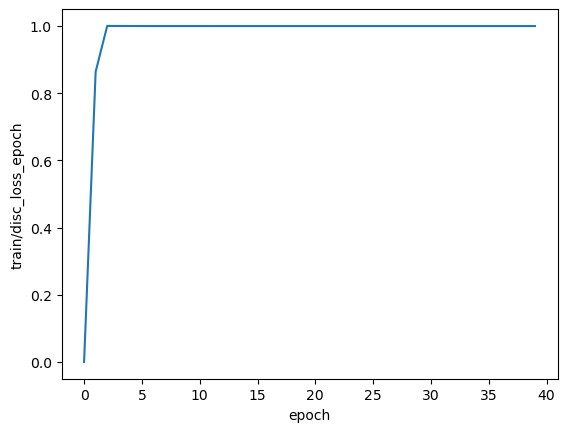

In [83]:
# sns.lineplot(data=train_df, x="epoch", y="train/total_loss_epoch")
# sns.lineplot(data=train_df, x="epoch", y="train/rec_loss_epoch")
# sns.lineplot(data=train_df, x="epoch", y="train/aeloss_epoch")
sns.lineplot(data=train_df, x="epoch", y="train/disc_loss_epoch")

In [86]:
val_list = []

for temp in df.columns.to_list():
    if "val" in temp and "epoch" in temp:
        val_list.append(temp)

print(len(val_list))

84


In [87]:
temp = df[["val/rec_loss_epoch", "val/aeloss_epoch"]].dropna()

In [88]:
epoches = [int(i) for i in range(0, len(temp))]
temp["epoch"] = epoches

<Axes: xlabel='epoch', ylabel='train/rec_loss_epoch'>

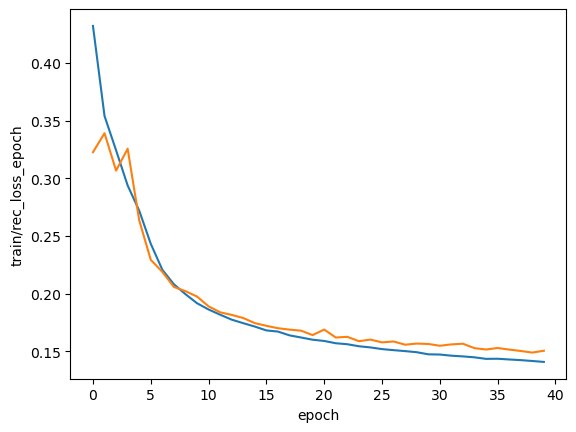

In [89]:
sns.lineplot(data=train_df, x="epoch", y="train/rec_loss_epoch")
sns.lineplot(data=temp, x="epoch", y="val/rec_loss_epoch")

In [99]:
train_loss = train_df["train/rec_loss_epoch"].to_list()
val_loss = temp["val/rec_loss_epoch"].to_list()
train_dsicrim_loss = train_df["train/disc_loss_epoch"].to_list()


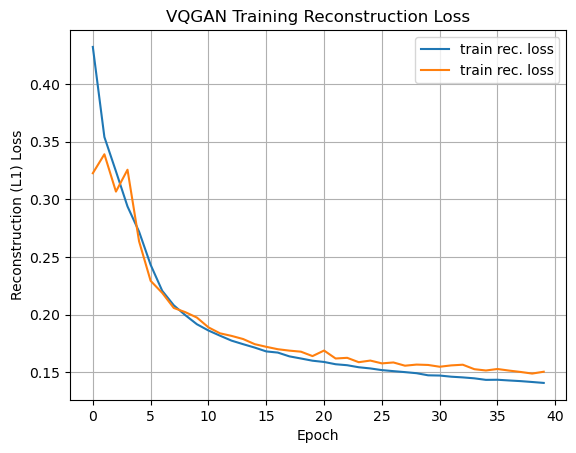

In [100]:
plt.plot(epoches, train_loss, label="train rec. loss")
plt.plot(epoches, val_loss, label="train rec. loss")
plt.legend()
plt.title("VQGAN Training Reconstruction Loss")
plt.xlabel("Epoch")
plt.ylabel("Reconstruction (L1) Loss")
plt.grid()
plt.savefig("vqgan_eval/losses/train_val_recon_loss.png")

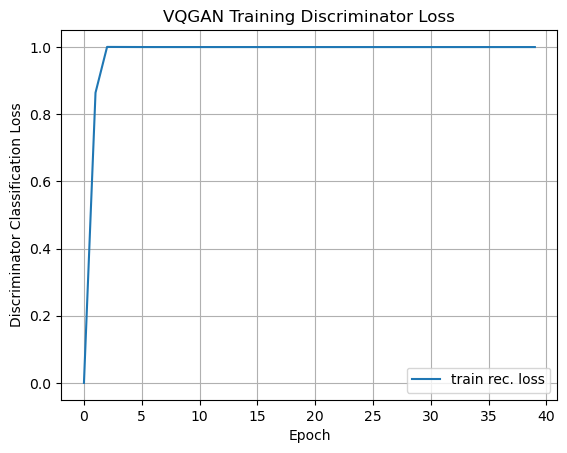

In [108]:
plt.plot(epoches, train_dsicrim_loss, label="train rec. loss")
plt.legend()
plt.title("VQGAN Training Discriminator Loss")
plt.xlabel("Epoch")
plt.ylabel("Discriminator Classification Loss")
plt.grid()
plt.savefig("vqgan_eval/losses/train_discrim_loss.png")

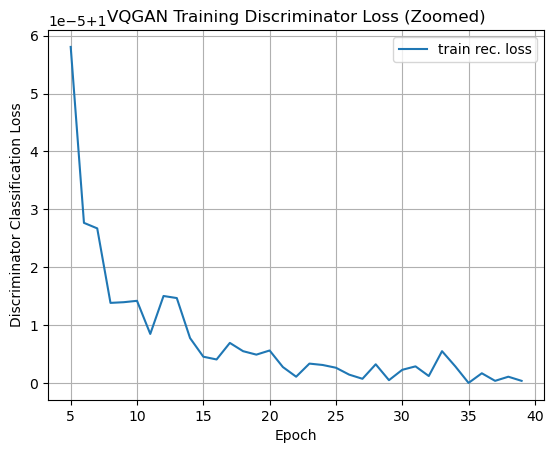

In [107]:
plt.plot(epoches[5:], train_dsicrim_loss[5:], label="train rec. loss")
plt.legend()
plt.title("VQGAN Training Discriminator Loss (Zoomed)")
plt.xlabel("Epoch")
plt.ylabel("Discriminator Classification Loss")
plt.grid()
plt.savefig("vqgan_eval/losses/train_discrim_loss_zoomed.png")